<font size="5">**Data Science Section 002 Group 7 Project Report**

<font size="3">**Research question:**  How accurately can knn-classification model utilizing age, serum cholesterol, and maximum heart rate achieved predict the presence or absence of heart disease in individuals?

Predictive data analysis plays an important role in the field of medical diagnostics. As cardiovascular disease continues to be a leading cause of global mortality, the development of efficient predictive models becomes crucial for detection and intervention. This analysis focuses on predicting the presence or absence of heart disease using key parameters from the Heart Disease dataset (Cleveland database) available on the UCI Machine Learning Repository. The original database contains 76 attributes, but a version containing a subset of only 14 of those attributes will be used for this analysis. Out of those 14 variables, only 5 are chosen for observation in our project: age (age), serum cholesterol (chol), maximum heart rate achieved (thalach), and our predicted variable, the diagnosis of heart disease (num, renamed "diagnosis").

We have chosen to use the K-nearest neighbors classification algorithm to continue our analysis, as it allows us to scale and compare our different variables in an easy and efficient way. The goal is to create and test a model using the training and testing data, respectively. We will be using this model to analyze the data in relation to the selected variables, and aim to effectively classify our testing data.

By the end of this analysis, we expect to gain insight into the complex relationships between our chosen variables and the presence of heart disease in patients. Such findings would contribute to medical research regarding cardiovascular disease by allowing healthcare systems to identify and focus on individuals at higher risk of heart diseases, enabling earlier intervention, and potentially reducing healthcare costs associated with advanced stages of heart disease. The analysis also prompts various questions for future analyses, such as exploring the interaction between lifestyle factors (smoking habits, exercise, and diet) and our chosen variables of cholesterol, age, heart rate and blood pressure in influencing the risk of heart disease.

To further understand our data, some preliminary exploratory data analysis is conducted below. To gain access to useful functions for reading and analyzing our data, the following libraries must be installed:

In [51]:
library(tidyverse)
library(tidymodels)

We can now read our dataset into R and assign it to an object called cleveland_data. We are also going to limit the amount of rows shown when previewing the dataset:

In [52]:
#Demostration that the dataset can be read from the web into R:
options(repr.matrix.max.rows = 10)

url <- "https://raw.githubusercontent.com/Nitro-87/Group-2-Project-Proposal/main/processed.cleveland.data"
cleveland_data <- read_delim(url, delim= "," , col_names=FALSE)

cleveland_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3


Since our data contains no column names, we rename each column with the appropriate variable name below. We also replace the numerical values under our categorical variables with what they are supposed to represent, to better understand what each variable reveals to us.

In [53]:
#Renaming columns:

cleveland_data <- rename(cleveland_data,
       age = X1,
       sex = X2,
       chest_pain_type = X3,
       trestbps = X4,
       chol = X5,
       fbs = X6,    
       restecg = X7,
       thalach = X8,
       exang = X9,
       oldpeak = X10,
       slope = X11,
       ca = X12,
       thal = X13,
       diagnosis = X14)

#skipping rows with missing values
cleveland_data<- cleveland_data |> drop_na()

glimpse(cleveland_data)

Rows: 303
Columns: 14
$ age             <dbl> 63, 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56, 56, 44…
$ sex             <dbl> 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, …
$ chest_pain_type <dbl> 1, 4, 4, 3, 2, 2, 4, 4, 4, 4, 4, 2, 3, 2, 3, 3, 2, 4, …
$ trestbps        <dbl> 145, 160, 120, 130, 130, 120, 140, 120, 130, 140, 140,…
$ chol            <dbl> 233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192,…
$ fbs             <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, …
$ restecg         <dbl> 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, …
$ thalach         <dbl> 150, 108, 129, 187, 172, 178, 160, 163, 147, 155, 148,…
$ exang           <dbl> 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, …
$ oldpeak         <dbl> 2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3.1, 0.4,…
$ slope           <dbl> 3, 2, 2, 3, 1, 1, 3, 1, 2, 3, 2, 2, 2, 1, 1, 1, 3, 1, …
$ ca              <chr> "0.0", "3.0", "2.0", "0.0", "0.0", "0.0", "2.0", "0.0"…
$ thal            

In [54]:
#renaming categorical variables:

#renaming sex values
cleveland_data <- cleveland_data |>
mutate(sex = as_factor(sex))|>
mutate(sex = fct_recode(sex, "female" = "0", 
                            "male" = "1"))
#renaming chest pain values
cleveland_data <- cleveland_data |>
mutate(chest_pain_type = as_factor(chest_pain_type))|>
mutate(chest_pain_type = fct_recode(chest_pain_type, 
                            "typical angina" = "1", 
                            "atypical angina" = "2", 
                            "non-anginal_pain" = "3", 
                            "asymptomatic" = "4"))
#renaming fbs values
cleveland_data <- cleveland_data |>
mutate(fbs = as_factor(fbs))|>
mutate(fbs = fct_recode(fbs, "false" = "0", 
                            "true" = "1"))
#renaming exang values
cleveland_data <- cleveland_data |>
mutate(exang = as_factor(exang))|>
mutate(exang = fct_recode(exang, "no" = "0", 
                            "yes" = "1"))
#renaming slope values
cleveland_data <- cleveland_data |>
mutate(slope = as_factor(slope))|>
mutate(slope = fct_recode(thal,"upsloping" = "1", 
                            "flat" = "2", 
                            "downsloping" = "3"))
#renaming thal values
cleveland_data <- cleveland_data |>
mutate(thal = as_factor(thal))|>
mutate(thal = fct_recode(thal, "reversible defect" = "7.0", 
                            "fixed defect" = "6.0", 
                            "normal" = "3.0"))
#renaming diagnosis values
cleveland_data <- cleveland_data |>
mutate(diagnosis = as_factor(diagnosis))|>
mutate(diagnosis = fct_recode(diagnosis, 
                            "absent" = "0",
                              "present" = "1", 
                            "present" = "2", 
                            "present" = "3", 
                            "present" = "4"))

glimpse(cleveland_data)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `slope = fct_recode(thal, upsloping = "1", flat = "2",
  downsloping = "3")`.
Caused by warning:
! Unknown levels in `f`: 1, 2, 3”


Rows: 303
Columns: 14
$ age             <dbl> 63, 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56, 56, 44…
$ sex             <fct> male, male, male, male, female, male, female, female, …
$ chest_pain_type <fct> typical angina, asymptomatic, asymptomatic, non-angina…
$ trestbps        <dbl> 145, 160, 120, 130, 130, 120, 140, 120, 130, 140, 140,…
$ chol            <dbl> 233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192,…
$ fbs             <fct> true, false, false, false, false, false, false, false,…
$ restecg         <dbl> 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, …
$ thalach         <dbl> 150, 108, 129, 187, 172, 178, 160, 163, 147, 155, 148,…
$ exang           <fct> no, yes, yes, no, no, no, no, yes, no, yes, no, no, ye…
$ oldpeak         <dbl> 2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3.1, 0.4,…
$ slope           <fct> 6.0, 3.0, 7.0, 3.0, 3.0, 3.0, 3.0, 3.0, 7.0, 7.0, 6.0,…
$ ca              <chr> "0.0", "3.0", "2.0", "0.0", "0.0", "0.0", "2.0", "0.0"…
$ thal            

We will be treating diagnosis as a categorical variable, so we should convert it into a factor using the as_factor() function:

In [55]:
cleveland_data <- cleveland_data |>
        mutate(diagnisis = as_factor(diagnosis))

We then want to filter our dataset to only include the diagnosis and variables that we want to observe which are age, chol and thalach.

In [56]:
cleveland_data_select <- select(cleveland_data, age, chol, thalach, diagnosis)
cleveland_data_select

age,chol,thalach,diagnosis
<dbl>,<dbl>,<dbl>,<fct>
63,233,150,absent
67,286,108,present
67,229,129,present
37,250,187,absent
41,204,172,absent
⋮,⋮,⋮,⋮
45,264,132,present
68,193,141,present
57,131,115,present


Now that our data is tidy and filtered, we can split it into a training set to construct our model, and a testing set to test our model's effectiveness.

In [57]:
cleveland_data_split <- initial_split(cleveland_data_select, prop = 0.75, strata = diagnosis)
training_set <- training(cleveland_data_split)
testing_set <- testing(cleveland_data_split)

training_set
testing_set

age,chol,thalach,diagnosis
<dbl>,<dbl>,<dbl>,<fct>
63,233,150,absent
41,204,172,absent
57,354,163,absent
56,294,153,absent
44,263,173,absent
⋮,⋮,⋮,⋮
59,176,90,present
57,241,123,present
45,264,132,present


age,chol,thalach,diagnosis
<dbl>,<dbl>,<dbl>,<fct>
67,229,129,present
37,250,187,absent
56,236,178,absent
57,192,148,absent
52,199,162,absent
⋮,⋮,⋮,⋮
39,220,152,absent
57,232,164,present
56,221,163,absent


Below is a table conducting exploratory analysis on our training dataset. This table tells us the number and percentage of observations in each class group (whether there is a presence/absence of heart disease).

In [58]:
num_obs <- nrow(training_set)
training_set |>
  group_by(diagnosis) |>
  summarize(
    count = n(),
    percentage = n() / num_obs * 100)

diagnosis,count,percentage
<fct>,<int>,<dbl>
absent,123,54.18502
present,104,45.81498


We can also use the training dataset to create a set of scatterplots to explore the relationship between our variables and how they correlate to the diagnosis.

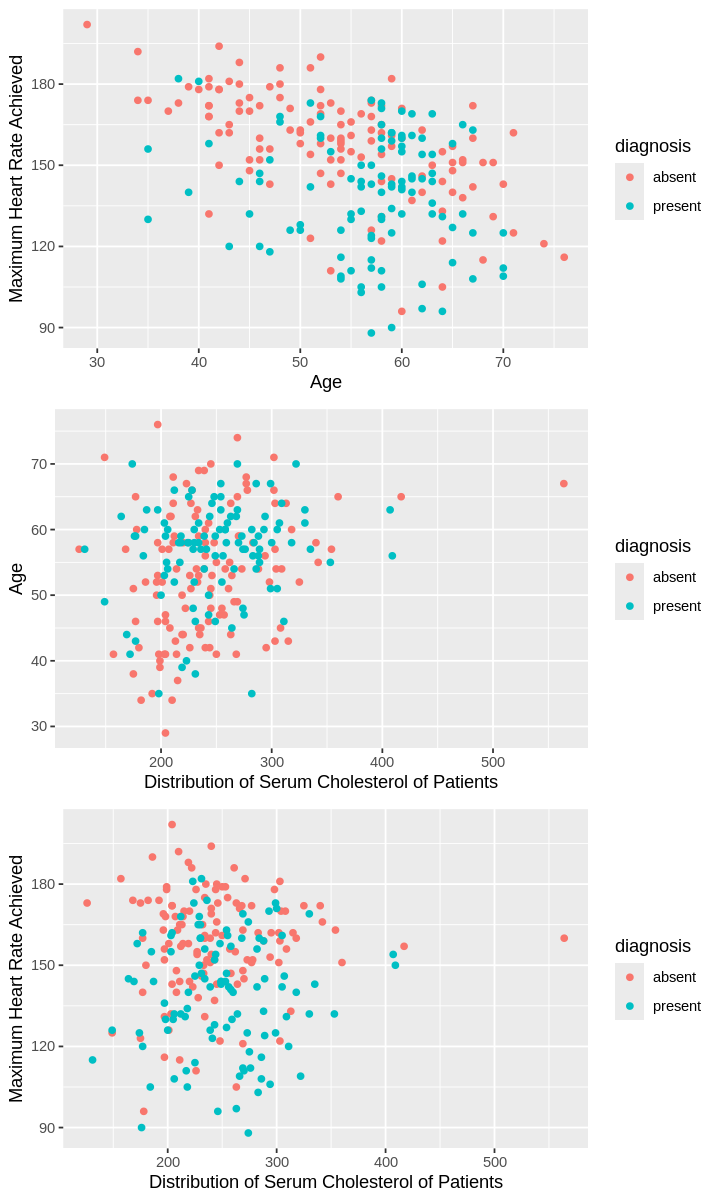

In [59]:
options(repr.plot.width = 6, repr.plot.height = 10)

age_vs_thalach_plot <- ggplot(training_set, aes(x = age, y=thalach)) +
                geom_point(aes(colour = diagnosis))+ 
                labs(x = "Age", y = "Maximum Heart Rate Achieved")

age_vs_chol_plot <- ggplot(training_set, aes(x = chol, y=age)) +
                geom_point(aes(colour = diagnosis))+ 
                labs(x = "Distribution of Serum Cholesterol of Patients", y="Age")

chol_vs_thalach_plot <- ggplot(training_set, aes(x = chol, y=thalach)) +
                geom_point(aes(colour = diagnosis))+ 
                labs(x = "Distribution of Serum Cholesterol of Patients", y = "Maximum Heart Rate Achieved")


gridExtra::grid.arrange(age_vs_thalach_plot, age_vs_chol_plot, chol_vs_thalach_plot, ncol = 1)

$\color{red}{\text{talk abt what the scatterplots tell us...}}$


To ensure all data observations are on a comparable scale and contribute equal shares to the calculations of our knn model, we need to scale the data first.



In [65]:
heart_recipe <- recipe(diagnosis ~ age + chol + thalach , data = cleveland_data_split) |>
step_scale(all_predictors()) |>
step_center(all_predictors())

heart_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 3



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



In [67]:
#creating classifier
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
       set_engine("kknn") |>
       set_mode("classification")

#training the classifier
heart_fit <- workflow() |>
       add_recipe(heart_recipe) |>
       add_model(knn_spec) |>
       fit(data = training_set)

heart_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3700441
Best kernel: rectangular
Best k: 3

In [70]:
#predicting class labels for test set
test_predictions <- predict(heart_fit , testing_set) |>
       bind_cols(testing_set)

test_predictions

.pred_class,age,chol,thalach,diagnosis
<fct>,<dbl>,<dbl>,<dbl>,<fct>
absent,67,229,129,present
present,37,250,187,absent
present,56,236,178,absent
absent,57,192,148,absent
absent,52,199,162,absent
⋮,⋮,⋮,⋮,⋮
absent,39,220,152,absent
absent,57,232,164,present
absent,56,221,163,absent


In [75]:
#finding out our classifier's accuracy

prediction_accuracy <- test_predictions |>
         metrics(truth = diagnosis, estimate = .pred_class)             


prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6052632
kap,binary,0.1988756


In [78]:
set.seed(1000)
#creating confusion matrix for the classifier
heart_mat <- test_predictions |> 
conf_mat(truth = diagnosis, estimate = .pred_class)

heart_mat

          Truth
Prediction absent present
   absent      28      17
   present     13      18

In [81]:
#performing 5-fold cross-validation

heart_vfold <- vfold_cv(training_set, v = 5, strata = diagnosis)

In [82]:
#performing workflow analysis again 

set.seed(1000)

heart_resample_fit <- workflow() |>
       add_recipe(heart_recipe) |>
       add_model(knn_spec) |>
       fit_resamples(resamples = heart_vfold)

In [83]:
#finding mean and standard error
heart_metrics<- collect_metrics(heart_resample_fit)
heart_metrics

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.6910408,5,0.02478204,Preprocessor1_Model1
roc_auc,binary,0.7155278,5,0.02041167,Preprocessor1_Model1


The goal of our analysis is to see which of the above variables in combination are most affective at predicting the presence of heart disease in patients. To do so, we will utilize cross validation for each variable, to build a KNN model for each variable, so that we may compare their effectiveness on a subset of our training data. Afterwards we will use the indicators we deemed effective for our KNN model on our testing data, and compare this to the efficacy of a KNN model using all of the four variables. In our analysis we will prioritize recall and accuracy, because of the possibly life affecting nature of heart disease which may cause heart attack or stroke. $\color{red}{\text{citation needed}}$

To achieve this, we will need to split our training data again, so that we can use a portion of it to test our classifiers on each variable.

Since we are doing the same analysis on each variable, we will do it side by side in the same code cells, as the code will be almost identical. We will test up to a relatively high $k$ value, since class imbalance won't be an issue.

In [61]:
#This model will be used for all classifications
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> set_engine("kknn") |> set_mode("classification")

age_recipe <- recipe(diagnosis ~ age, data=training_subset) |> step_scale(all_predictors()) |> step_center(all_predictors())
heart_rate_recipe <-  recipe(diagnosis ~ thalach, data=training_subset) |> step_scale(all_predictors()) |> step_center(all_predictors())
cholesterol_recipe <- recipe(diagnosis ~ chol, data=training_subset) |> step_scale(all_predictors()) |> step_center(all_predictors())
blood_pressure_recipe <- recipe(diagnosis ~ trestbps, data=training_subset) |> step_scale(all_predictors()) |> step_center(all_predictors())

training_vfold = vfold_cv(training_subset,v = 5, strata = diagnosis)
kvals <- tibble(neighbors = seq(from = 2, to = 16, by = 2))

knn_age <- workflow() |> add_recipe(age_recipe) |> add_model(knn_tune) |> tune_grid(resamples = training_vfold, grid = kvals) |> collect_metrics()
knn_hr <- workflow() |> add_recipe(heart_rate_recipe) |> add_model(knn_tune) |> tune_grid(resamples = training_vfold, grid = kvals) |> collect_metrics()
knn_chol <- workflow() |> add_recipe(cholesterol_recipe) |> add_model(knn_tune) |> tune_grid(resamples = training_vfold, grid = kvals) |> collect_metrics()
knn_bp <- workflow() |> add_recipe(blood_pressure_recipe) |> add_model(knn_tune) |> tune_grid(resamples = training_vfold, grid = kvals) |> collect_metrics()
age_acc <- knn_age |> filter(.metric == "accuracy") |> select(neighbors, mean) |> mutate(variable = "age")
hr_acc <- knn_hr |> filter(.metric == "accuracy") |> select(neighbors, mean) |> mutate(variable = "hr")
chol_acc <- knn_chol |> filter(.metric == "accuracy") |> select(neighbors, mean) |> mutate(variable = "chol")
bp_acc <- knn_bp |> filter(.metric == "accuracy") |> select(neighbors, mean) |> mutate(variable = "bp")
#Now we will combine the accuracies into a single data set for plotting
acc <- bind_rows(age_acc,hr_acc, chol_acc, bp_acc)
best_k_age <- age_acc |> arrange(mean) |> slice(8) |> select(neighbors) |> pull()
best_k_hr <- hr_acc |> arrange(mean) |> slice(8) |> select(neighbors) |> pull()
best_k_chol <- chol_acc |> arrange(mean) |> slice(8) |> select(neighbors) |> pull()
best_k_bp <- bp_acc |> arrange(mean) |> slice(8) |> select(neighbors) |> pull()

ERROR: Error in eval(expr, envir, enclos): object 'training_subset' not found


Now we can compare the effectiveness of each $k$ value on predictions using each individual variable, so that we can compare the efficacies using th best $k$-values for each variable.

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 3)
#I will include a plot here color coding each variable, and plotting all variables accuracy vs k
cross_val_plot <- acc |> ggplot(aes(x=neighbors,y=mean)) + geom_line(aes(colour = variable)) + 
labs(x="neighbors", y="accuracy") + ggtitle("How number of neighbors affects accuracy")
cross_val_plot

Now we can compare how effective our predictors are on the testing subset of our training data, in order to choose which predictors we would like to use for our final model.

In [ ]:
knn_spec_age <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k_age) |> set_engine("kknn") |> set_mode("classification")
knn_spec_hr <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k_hr) |> set_engine("kknn") |> set_mode("classification")
knn_spec_bp <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k_bp) |> set_engine("kknn") |> set_mode("classification")
knn_spec_chol <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k_chol) |> set_engine("kknn") |> set_mode("classification")

age_fit <- workflow() |> add_recipe(age_recipe) |> add_model(knn_spec_age) |> fit(training_subset)
hr_fit <- workflow() |> add_recipe(heart_rate_recipe) |> add_model(knn_spec_hr) |> fit(training_subset)
bp_fit <- workflow() |> add_recipe(blood_pressure_recipe) |> add_model(knn_spec_bp) |> fit(training_subset)
chol_fit <- workflow() |> add_recipe(cholesterol_recipe) |> add_model(knn_spec_chol) |> fit(training_subset)

age_pred <- predict(age_fit,testing_subset) |> bind_cols(testing_subset)
hr_pred <- predict(hr_fit,testing_subset) |> bind_cols(testing_subset)
bp_pred <- predict(bp_fit,testing_subset) |> bind_cols(testing_subset)
chol_pred <- predict(chol_fit,testing_subset) |> bind_cols(testing_subset)

#here we use the formulas to compute recall/accuracy for each predictor
age_acc <- nrow(filter(age_pred, .pred_class == diagnosis))/nrow(age_pred)
age_recall <- nrow(filter(age_pred, .pred_class == "present" & diagnosis == "present"))/nrow(filter(age_pred,diagnosis == "present"))
hr_acc <- nrow(filter(hr_pred, .pred_class == diagnosis))/nrow(hr_pred)
hr_recall <- nrow(filter(hr_pred, .pred_class == "present" & diagnosis == "present"))/nrow(filter(hr_pred,diagnosis == "present"))
bp_acc <- nrow(filter(bp_pred, .pred_class == diagnosis))/nrow(bp_pred)
bp_recall <- nrow(filter(bp_pred, .pred_class == "present" & diagnosis == "present"))/nrow(filter(bp_pred,diagnosis == "present"))
chol_acc <- nrow(filter(chol_pred, .pred_class == diagnosis))/nrow(chol_pred)
chol_recall <- nrow(filter(chol_pred, .pred_class == "present" & diagnosis == "present"))/nrow(filter(chol_pred,diagnosis == "present"))

#Now as a tibble
var_names <- as_tibble(c("age", "age", "max heart rate", "max heart rate", "resting blood pressure","resting blood pressure", "serum cholesterol", "serum cholesterol")) |> rename(variable = value)
metric_type <- as_tibble(c("accuracy", "recall","accuracy", "recall","accuracy", "recall","accuracy", "recall")) |> rename(metric = value)
value <- as_tibble(c(age_acc,age_recall,hr_acc,hr_recall,bp_acc,bp_recall,chol_acc,chol_recall))     
recall_acc_preds <- bind_cols(var_names,metric_type,value)
recall_preds <- recall_acc_preds |> filter(metric == "recall")
acc_preds <- recall_acc_preds |> filter(metric == "accuracy")

Here are plots comparing the accuracy and recall of a model when using each predictor respectively

In [ ]:
accuracy_plot <- ggplot(acc_preds, aes(x = variable, y = value)) + geom_bar(stat = "identity", aes(fill = variable)) + 
                    labs(x = "predictor", y = "accuracy") + theme(axis.text.x = element_text(angle = 65, hjust = 1)) +
                    ggtitle("Accuracy Comparison of Predictors")
recall_plot <- ggplot(recall_preds, aes(x = variable, y = value)) + geom_bar(stat = "identity", aes(fill = variable)) + 
                    labs(x = "predictor", y = "recall") + theme(axis.text.x = element_text(angle = 65, hjust = 1)) +
                    ggtitle("Recall Comparison of Predictors")
accuracy_plot
recall_plot

As shown, the max heart rate seems to be the best of the predictors. However, we also need to determine if a combination of these predictors creates a better classification model. To do this, we perform forward selection as discussed in chapter 6.8 of the textbook. 

In [ ]:
accuracies <- tibble(size = integer(),
                     model_string = character(),
                     accuracy = numeric())

names <- colnames(training_set |> select(-diagnosis))

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# create a 5-fold cross-validation object
hd_vfold <- vfold_cv(training_set, v = 5, strata = diagnosis)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("diagnosis", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        hd_recipe <- recipe(as.formula(model_string),
                                data = training_set) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the K-NN classifier with these predictors,
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(hd_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = hd_vfold, grid = 10) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |>
      add_row(size = i,
              model_string = models[[jstar]],
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

From forward selection, it appears that thalach (max heart rate) alone is the best subset of the predictors. 

## Data Analysis

Thus, from the analysis above we will be using a classification model with the thalach predictor. For further analysis we will also measure the performance of a classification model trained using all four predictor values.

In [ ]:
# Perform analysis using 1 predictor - thalach
set.seed(1)

#Create model
knn_spec_final <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k_hr) |> set_engine("kknn") |> set_mode("classification")
final_recipe <-  recipe(diagnosis ~ thalach, data=training_set) |> step_scale(all_predictors()) |> step_center(all_predictors())
final_fit <- workflow() |> add_recipe(final_recipe) |> add_model(knn_spec_final) |> fit(training_set)

#Perform classification and analyze
final_pred <- predict(final_fit,testing_set) |> bind_cols(testing_set)
final_acc <- nrow(filter(final_pred, .pred_class == diagnosis))/nrow(final_pred)
final_recall <- nrow(filter(final_pred, .pred_class == "present" & diagnosis == "present"))/nrow(filter(final_pred,diagnosis == "present"))

# Perform analysis using all predictors - thalach, age, trestbps, chol

#Find best k value for using all predictors
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> set_engine("kknn") |> set_mode("classification")
all_recipe_k <- recipe(diagnosis ~ ., data=training_set) |> step_scale(all_predictors()) |> step_center(all_predictors())

training_all_vfold = vfold_cv(training_set,v = 5, strata = diagnosis)
kvals <- tibble(neighbors = seq(from = 2, to = 30, by = 2))
knn_all <- workflow() |> add_recipe(all_recipe_k) |> add_model(knn_tune) |> tune_grid(resamples = training_all_vfold, grid = kvals) |> collect_metrics()
all_acc <- knn_all |> filter(.metric == "accuracy") |> select(neighbors, mean) |> mutate(variable = "age")
best_k_all <- all_acc |> arrange(mean) |> tail(n = 1) |> select(neighbors) |> pull()

#Create model
knn_spec_all <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k_all) |> set_engine("kknn") |> set_mode("classification")
all_recipe <-  recipe(diagnosis ~ ., data=training_set) |> step_scale(all_predictors()) |> step_center(all_predictors())
all_fit <- workflow() |> add_recipe(all_recipe) |> add_model(knn_spec_all) |> fit(training_set)

#Perform classification and analyze
all_pred <- predict(all_fit,testing_set) |> bind_cols(testing_set)
all_acc <- nrow(filter(all_pred, .pred_class == diagnosis))/nrow(all_pred)
all_recall <- nrow(filter(all_pred, .pred_class == "present" & diagnosis == "present"))/nrow(filter(all_pred,diagnosis == "present"))


predictors <- as_tibble(c("all", "all", "max heart rate", "max heart rate")) |> rename(predictor = value)
metric_type <- as_tibble(c("accuracy", "recall","accuracy", "recall")) |> rename(metric = value)
value <- as_tibble(c(all_acc,all_recall,final_acc,final_recall))  
recall_acc_preds <- bind_cols(predictors,metric_type,value)
recall_preds <- recall_acc_preds |> filter(metric == "recall")
acc_preds <- recall_acc_preds |> filter(metric == "accuracy")

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 4)
accuracy_plot <- ggplot(acc_preds, aes(x = predictor, y = value)) + geom_bar(stat = "identity", aes(fill = predictor)) + 
                    labs(x = "predictor", y = "accuracy") +
                    ggtitle("Accuracy Comparison of Predictors") + ylim(0, 0.7)
recall_plot <- ggplot(recall_preds, aes(x = predictor, y = value)) + geom_bar(stat = "identity", aes(fill = predictor)) + 
                    labs(x = "predictor", y = "recall") +
                    ggtitle("Recall Comparison of Predictors")

gridExtra::grid.arrange(accuracy_plot, recall_plot, ncol = 2)

Here we can see that the accuracy and recall of using all predictors compared to just using heart rate is very similar, with the accuracy being slightly better when using only max heart rate. This is useful, since it indicated that we only need data on max heart rate to make predictions of heart disease in patients, and that more data need not be processed or analyzed for this process, saving time and energy.

Overall the analysis is unsatisfactory, as the two important metrics, accuracy and recall are quite poor, at just above 60% and below 50% respectively.